<a href="https://colab.research.google.com/github/neerajthandayan/Tensorflow-2.0/blob/main/Recurrent%20Neural%20Network/SimpleRNNSine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

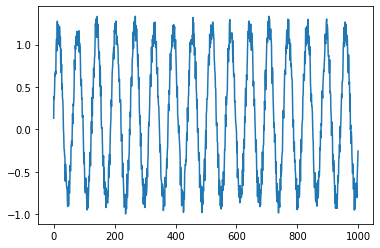

In [18]:
# Making Sine Wave series

series = np.sin(0.1*np.arange(1000)) + np.random.rand(1000)*0.35

# Plotting series
plt.plot(series)

In [22]:
# Building a Dataset 

T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t + T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)

In [25]:
# Setting up RNN Model

i = Input(shape=(T, 1))
x = SimpleRNN(15, activation='relu')(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss='mse',
              optimizer=Adam(0.001))

# Training Model

r = model.fit(X[:-N//2],
              Y[:-N//2],
              epochs=100,
              validation_data=(X[-N//2:],
                               Y[-N//2:]))

Epoch 1/100
16/16 [==============================] - 1s 23ms/step - loss: 1.0828 - val_loss: 0.8019
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.7514 - val_loss: 0.5436
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5064 - val_loss: 0.3711
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3416 - val_loss: 0.3008
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2872 - val_loss: 0.2561
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.2401 - val_loss: 0.2205
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2065 - val_loss: 0.1888
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1827 - val_loss: 0.1593
Epoch 9/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1495 - val_loss: 0.1310
Epoch 10/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1253 - val_loss: 0.1042
Epoch 11

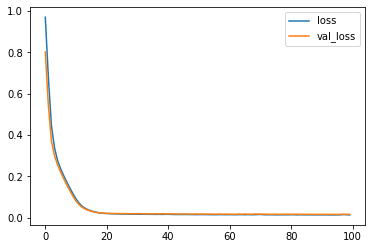

In [26]:
# Plotting Loss

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [27]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

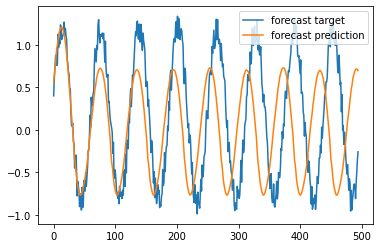

In [28]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()